In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
bank_data=pd.read_csv(r"//Users//sreeramkn//Downloads//bank-full.csv",sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Initial investigation

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
pd.set_option('max_column',None)

In [7]:
bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Number of features and records in the given data set is 17 and 45211 respesctively

There is no null values in the data set

The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

### Data preparation

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
bank_data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [11]:
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
bank_data['default'].nunique(),bank_data['housing'].nunique(),bank_data['loan'].nunique()

(2, 2, 2)

In [13]:
bank_data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
bank_data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [15]:
bank_data[['job']]=le.fit_transform(bank_data[['job']])
bank_data[['marital']]=le.fit_transform(bank_data[['marital']])
bank_data[['education']]=le.fit_transform(bank_data[['education']])
bank_data[['default']]=le.fit_transform(bank_data[['default']])
bank_data[['contact']]=le.fit_transform(bank_data[['contact']])
bank_data[['poutcome']]=le.fit_transform(bank_data[['poutcome']])
bank_data[['y']]=le.fit_transform(bank_data[['y']])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,yes,no,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,yes,no,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,yes,yes,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,yes,no,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,no,no,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,no,no,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,no,no,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,no,no,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,no,no,1,17,nov,508,4,-1,0,3,0


In [16]:
bank_data['housing']=le.fit_transform(bank_data['housing'])
bank_data['loan']=le.fit_transform(bank_data['loan'])
bank_data['month']=le.fit_transform(bank_data['month'])
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [17]:
bank_data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

### Model building

In [18]:
x=bank_data.iloc[:,:16]
y=bank_data['y']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

### Model training

In [21]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

### Model testing

In [22]:
y_pred_train=log_model.predict(x_train)
y_pred_test=log_model.predict(x_test)

### Model Evaluation 

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,auc

In [24]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     34913
           1       0.17      0.57      0.26      1255

    accuracy                           0.89     36168
   macro avg       0.58      0.74      0.60     36168
weighted avg       0.95      0.89      0.92     36168



In [25]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8742
           1       0.15      0.55      0.24       301

    accuracy                           0.88      9043
   macro avg       0.57      0.72      0.59      9043
weighted avg       0.96      0.88      0.91      9043



In [26]:
confusion_matrix_train=confusion_matrix(y_train,y_pred_train)
confusion_matrix_train

array([[31420,   538],
       [ 3493,   717]])

In [27]:
print(confusion_matrix(y_test,y_pred_test))

[[7829  135]
 [ 913  166]]


0.5684474365413592


Text(0, 0.5, 'True Positive Rate')

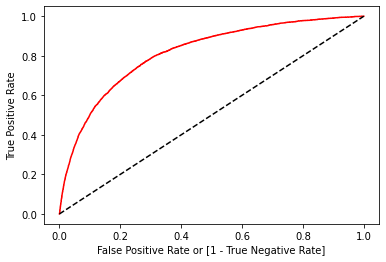

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Imbalaced data

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='y', ylabel='count'>

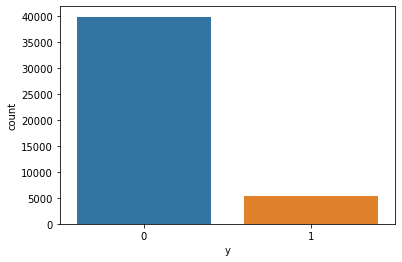

In [30]:
sns.countplot(bank_data['y'])

In [31]:
bank_data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

The No of data available for the 'yes' category, is comparitively low than than 'No' category, this may affect the accuracy of the model because there is no balance of data between those categories

Hence there is a need of balancing the data.

## Under sampling

#### Data preparation

In [32]:
count_0=bank_data[bank_data['y']==0]
count_1=bank_data[bank_data['y']==1]

In [33]:
count_0.shape,count_1.shape

((39922, 17), (5289, 17))

In [34]:
under_count_0=count_0.sample(5289)

In [35]:
under_count_0.shape,count_1.shape

((5289, 17), (5289, 17))

In [36]:
under_sample=pd.concat([under_count_0,count_1],axis=0)
under_sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20404,30,3,2,2,0,3362,0,0,0,12,1,101,2,-1,0,3,0
19663,31,9,2,2,0,319,0,1,0,7,1,446,1,-1,0,3,0
18053,51,9,1,1,1,61,0,1,1,30,5,27,20,-1,0,3,0
22963,33,4,2,2,0,0,0,0,0,26,1,60,2,-1,0,3,0
35443,50,6,2,1,0,766,1,0,0,7,8,253,2,304,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


#### Model building|training|testing|evaluation for undersampled data

In [37]:
under_x=under_sample.iloc[:,:16]
under_y=under_sample['y']

In [38]:
x_untrain,x_untest,y_untrain,y_untest=train_test_split(under_x,under_y,test_size=0.2)

In [39]:
under_model=LogisticRegression().fit(x_untrain,y_untrain)

In [40]:
y_pred_untrain=under_model.predict(x_untrain)
y_pred_untest=under_model.predict(x_untest)

In [41]:
print(confusion_matrix(y_untrain,y_pred_untrain))

[[3319  893]
 [1117 3133]]


In [42]:
print(confusion_matrix(y_untest,y_pred_untest))

[[865 212]
 [264 775]]


In [43]:
print(classification_report(y_untest,y_pred_untest))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1077
           1       0.79      0.75      0.77      1039

    accuracy                           0.78      2116
   macro avg       0.78      0.77      0.77      2116
weighted avg       0.78      0.78      0.77      2116



0.7745332228778654


Text(0, 0.5, 'True Positive Rate')

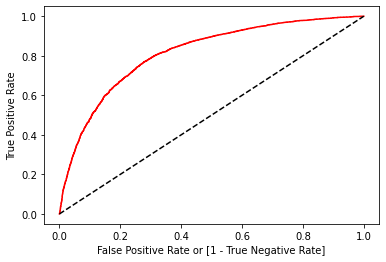

In [44]:
fpr, tpr, thresholds = roc_curve(under_y, log_model.predict_proba (under_x)[:,1])

auc = roc_auc_score(y_untest, y_pred_untest)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### Oversampling - SMOTE

In [45]:
!pip install imblearn

#### Data preparation

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote=SMOTE(sampling_strategy='minority')

In [48]:
x_sm,y_sm=smote.fit_resample(x,y)

In [49]:
x_sm.shape,y_sm.shape

((79844, 16), (79844,))

#### Model building|training|testing|evaluation for oversampled data

In [50]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

In [51]:
smote_model=LogisticRegression()
smote_model.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [52]:
y_pred_sm=smote_model.predict(x_test_sm)

In [53]:
print(classification_report(y_test_sm,y_pred_sm))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      7985
           1       0.81      0.78      0.80      7984

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969



0.7997357504614739


Text(0, 0.5, 'True Positive Rate')

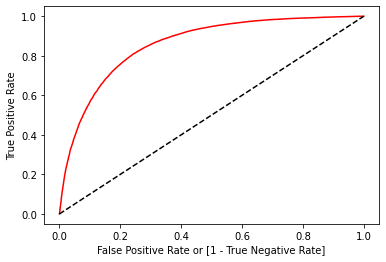

In [54]:
fpr, tpr, thresholds = roc_curve(y_sm, log_model.predict_proba (x_sm)[:,1])

auc = roc_auc_score(y_test_sm, y_pred_sm)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')